# __The Buzz__

_A News App built using the Streamlit library on Python_

Version 1.0.0 is now out! Check it out: __https://the-buzz.streamlit.app/__


#### __Features__:
* The app allows you to search for all news articles and top headlines, specifically
* __For all news__: you can search using a specific keyword and language. You may also choose to have articles according to relevancy, popularity, or when published.
* __For top headlines__: you can search for top headlines/breaking news using a specific keyword and/or category (from the given list, according to NewsAPI)
* Further, you can choose between a range of dates (up to a month back though, because that's all that a free plan on NewsAPI allows for).
* Lastly, users can choose how many articles they want for their search (they can choose between 0 to 10)

#### __Limitations:__
* These are mostly pertaining to the NewsAPI
    * Up to 100 requests a day
    * Can only search for news up to a month back

#### __App expansion plans:__
* Add text summariser (using BERT) to summarise each article
* Allow users to choose sources they would like to see news from
* Allow for country based searches

### __Contents of the Report__

1. Screenshots of the app
2. User/Developer guide (including explanation of the directory and files)
3. Annotated code for all files

## __Part 1: Screenshots of the App__

### Page 1: __'Welcome' page__

Here the user can access __all news__ articles, through the _'everything'_ NewsAPI endpoint. Users can enter the keyword, the language, the dates, and number of articles they want. Optionally, they can also ask for articles to be sorted by either 1. relevancy, 2. popularity, or 3. when it's published. 

In this example, we will find 3 articles on `elections AND erdogan` in English, between 15th May (2023) to 1st June (2023). We will sort our articles by popularity.

##### __Inputs on the page__:

* Users must enter a keyword and choose the language (by default, German is already chosen). Choosing how they want to sort/order articles is optional. If users miss entering a keyword, an error pops up that informs them to enter a keyword.

* Further, users must agree to terms and conditions (just a basic thing which asks users not to request too much from the API :) but this is just a fun feature). Users must click agree, else an error pops up.

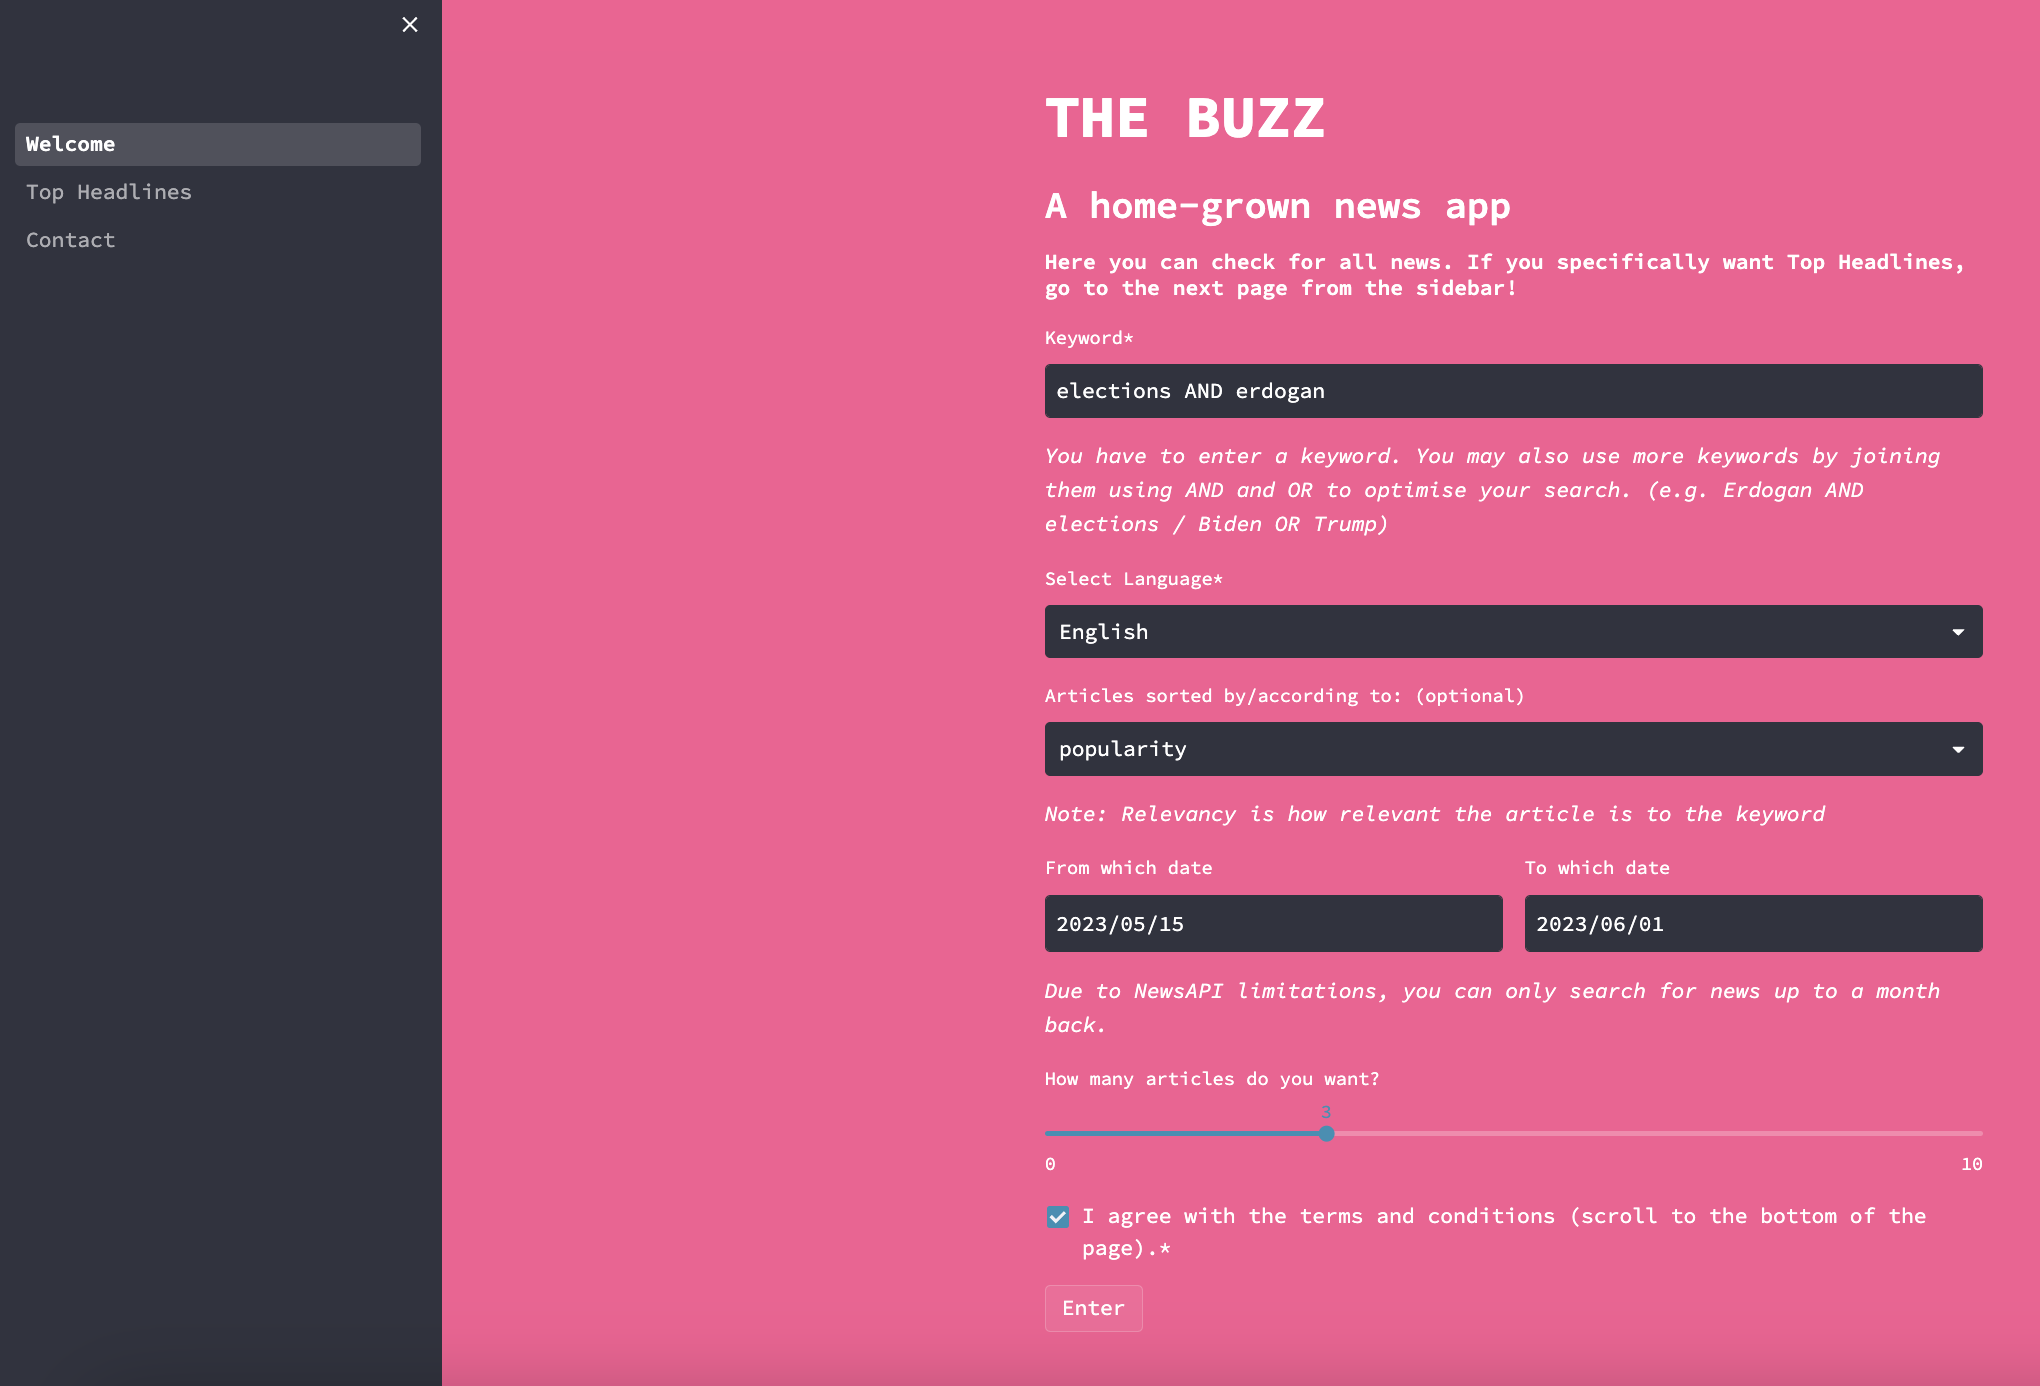

##### __Search results__:

Here are the search results. When possible, a photo will appear. If it is not possible to display a photo, it will read __"Unable to display image."__ Furthermore, from here, users can click the link to read the full article and it will pop up on a new tab.

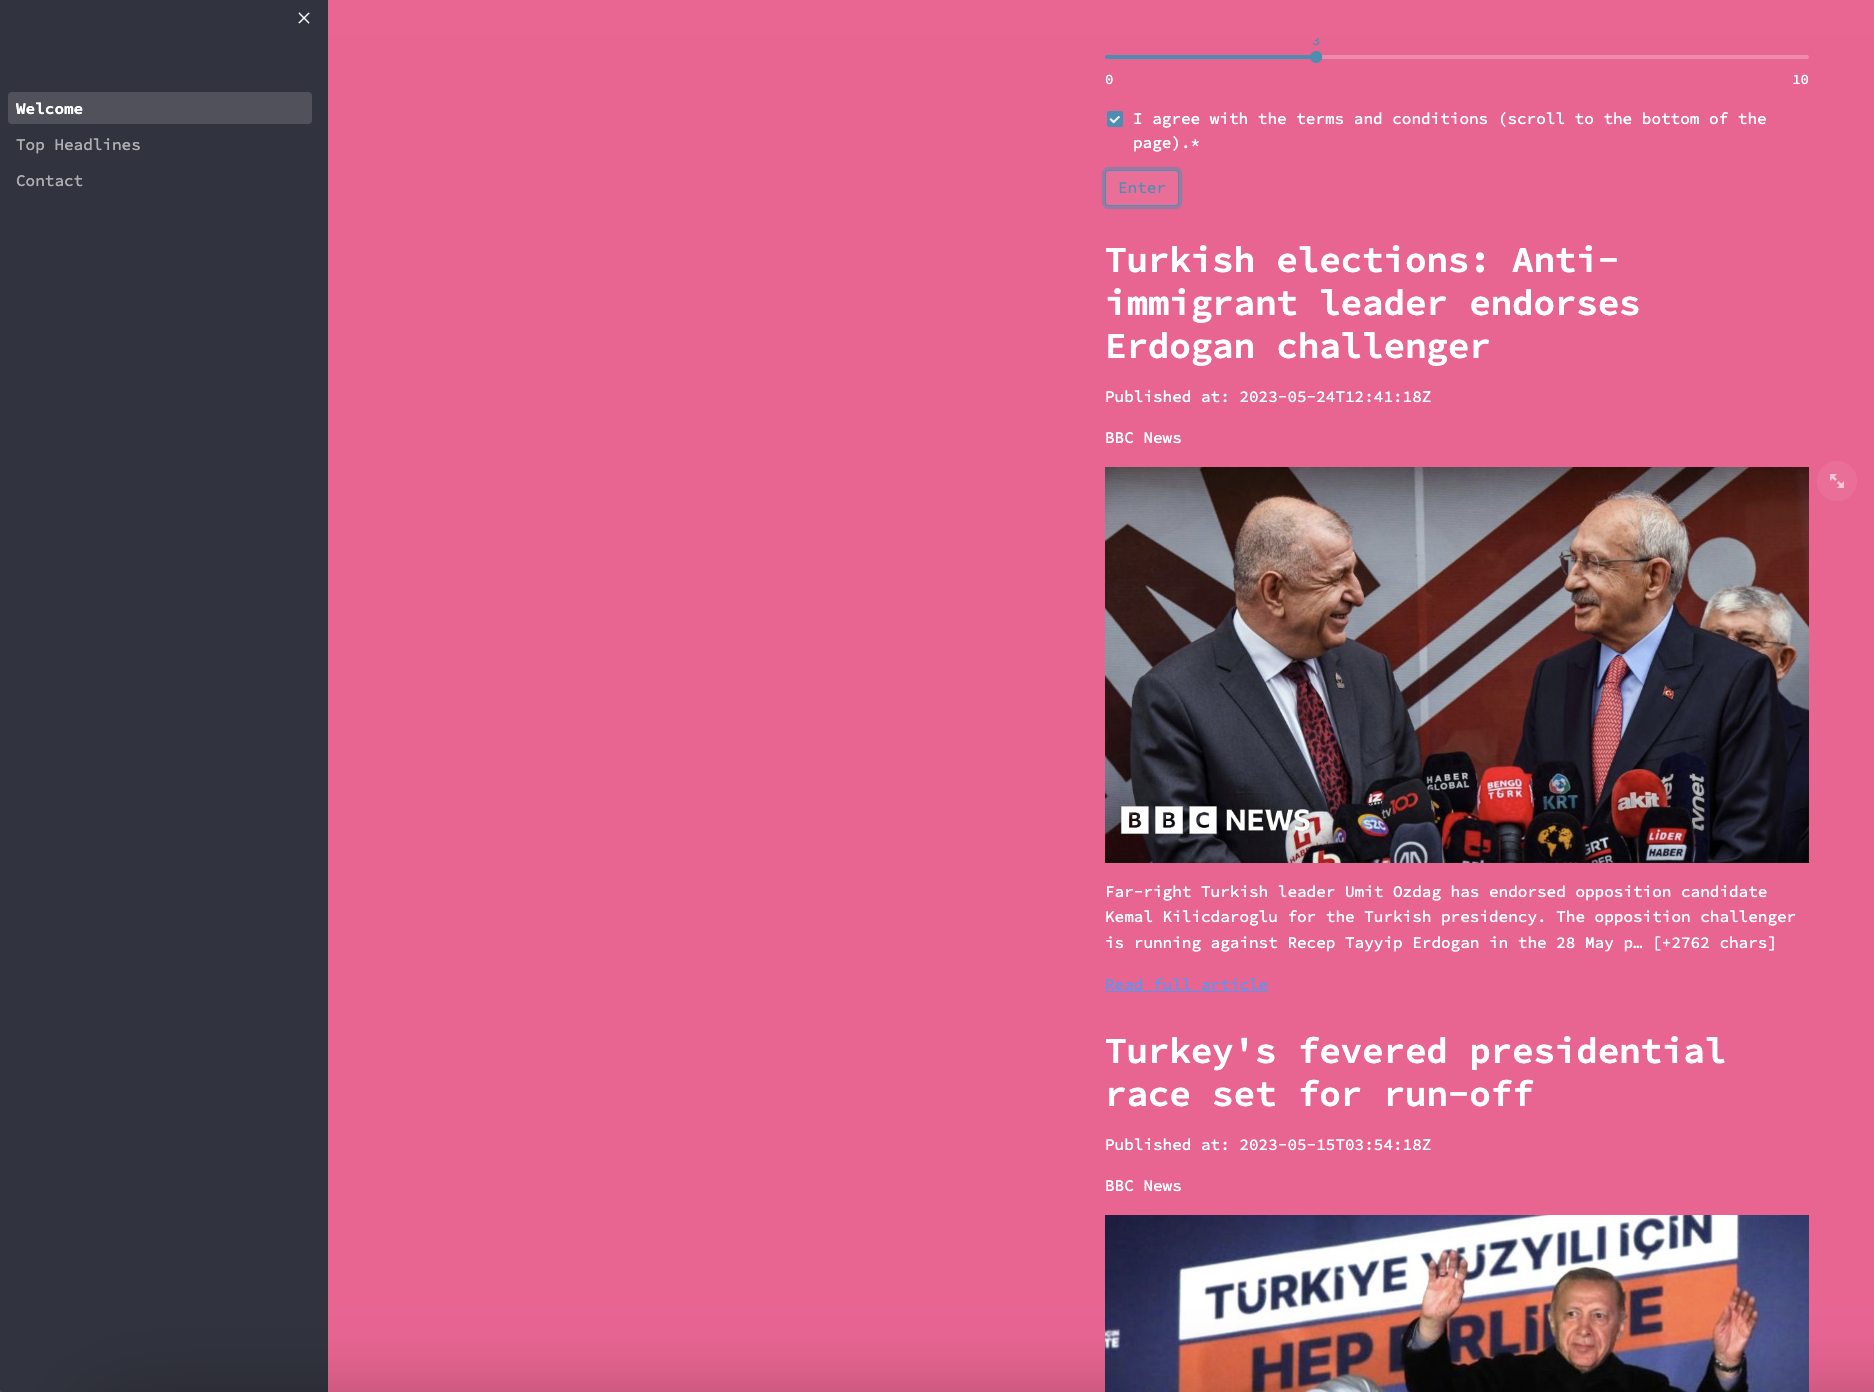

##### __Terms and Conditions__:

Here is a small screenshot of the terms and conditions (it is at the bottom of the Welcome page).

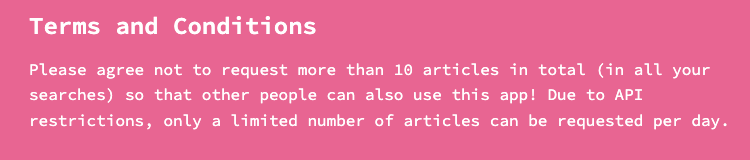

### Page 2: __'Top Headlines' page__

Here the user can access __top headlines/breaking news__ articles, through the _'top-headlines'_ NewsAPI endpoint by specifying keyword or category, languages, dates, and number of articles they want. 

In this example, we will find 3 top articles on the `business` category, without a keyword but in Dutch, between 31st May (2023) to 2nd June (2023). 

##### __Inputs on the page__:

Users can enter the language, the dates, and number of articles they want. Optionally, they can also enter a keyword and/or a category to retrieve top news articles from. 

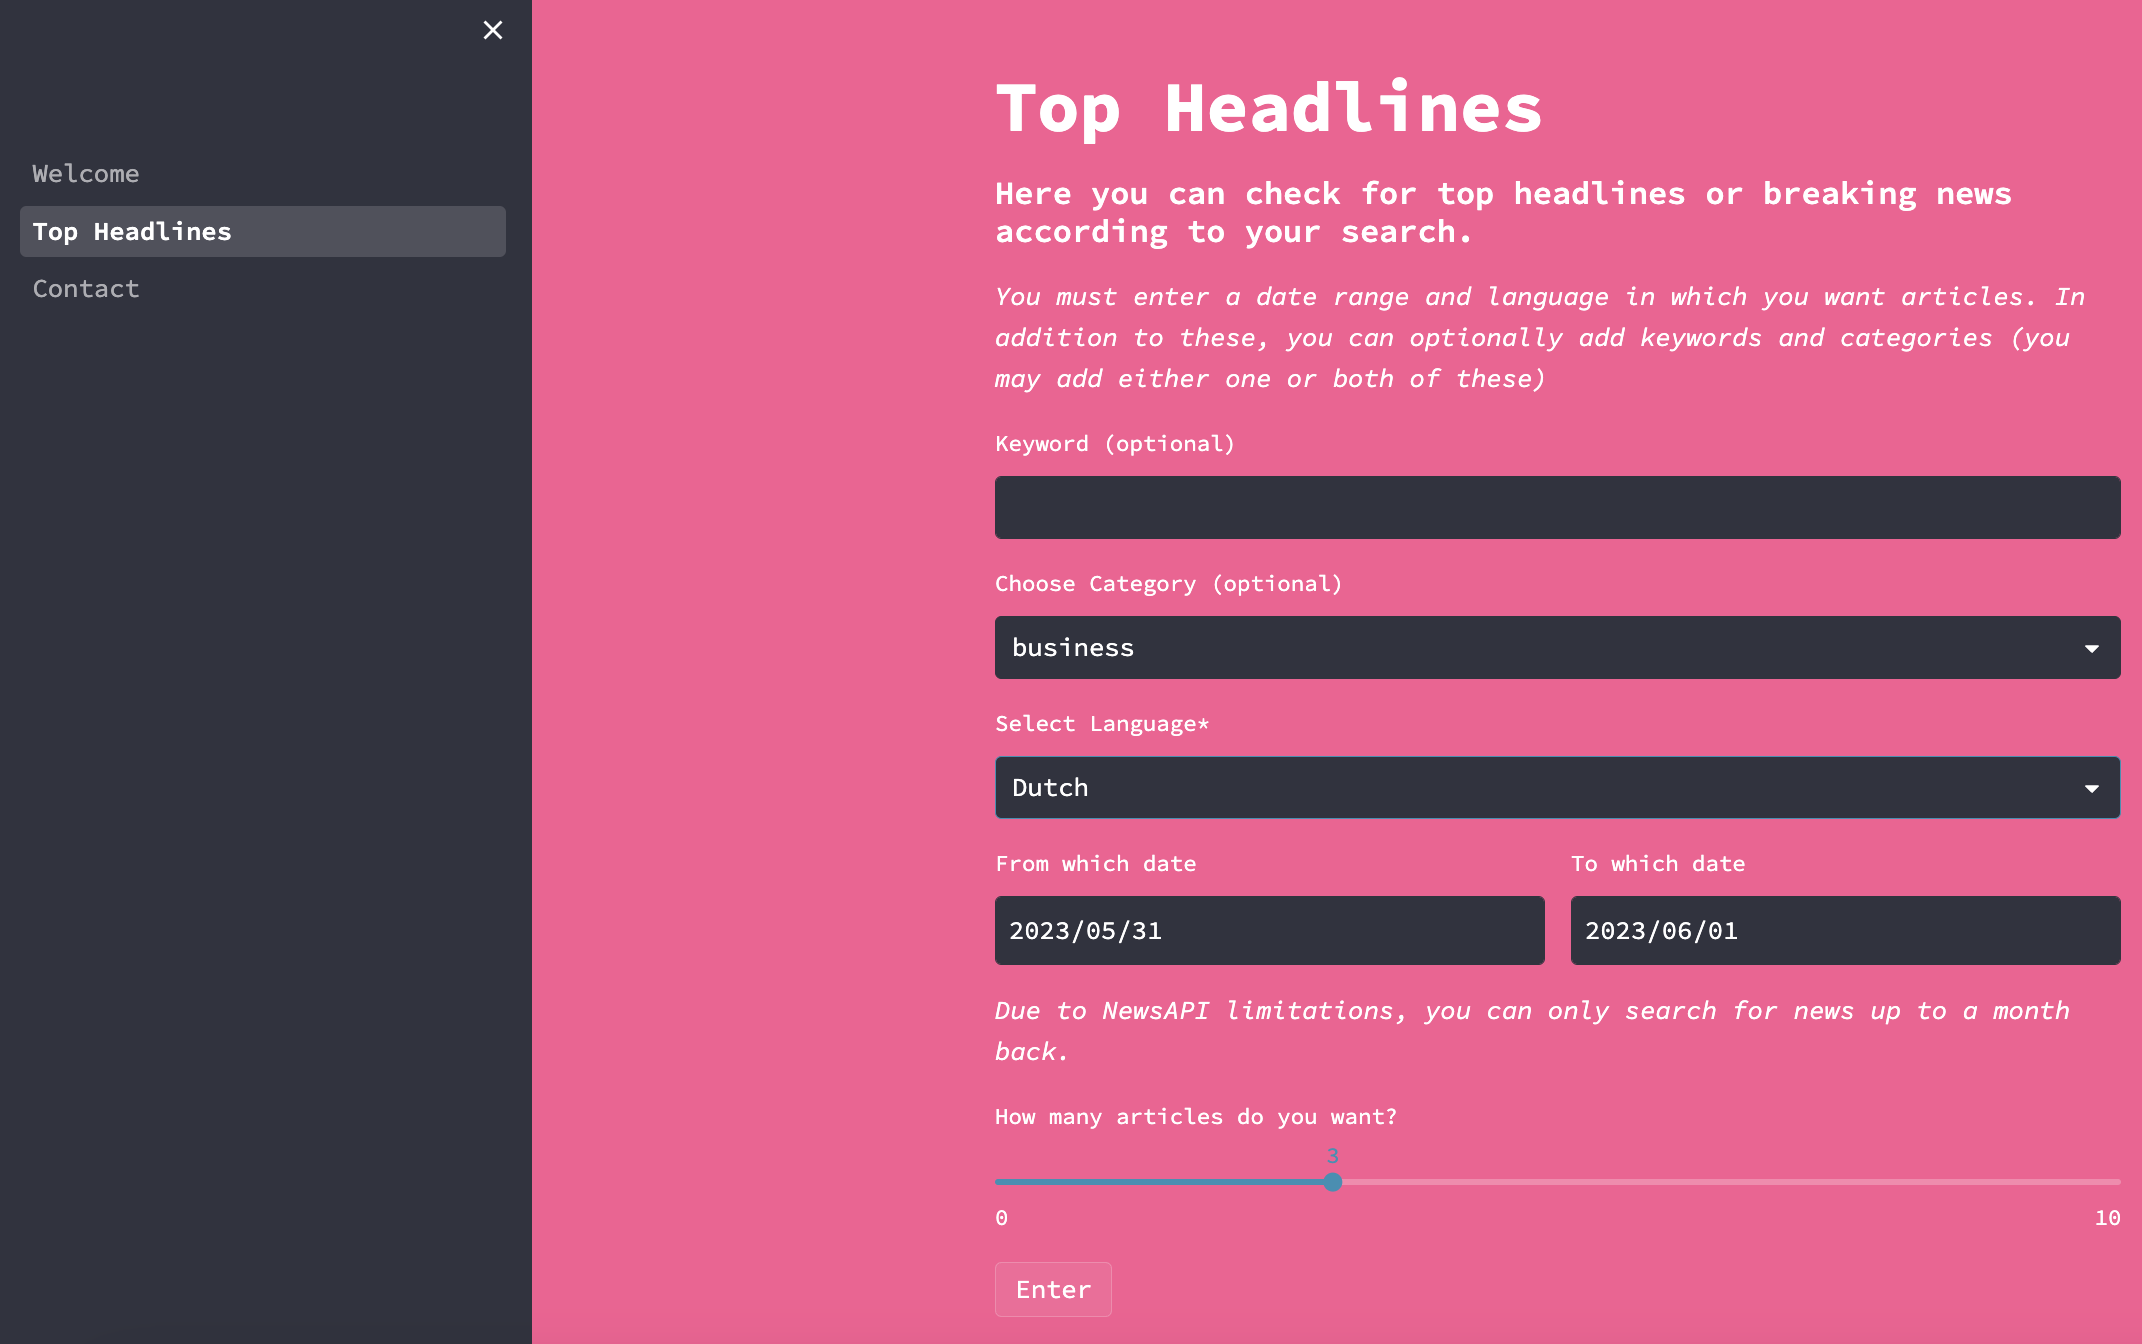

#### __Search results__:

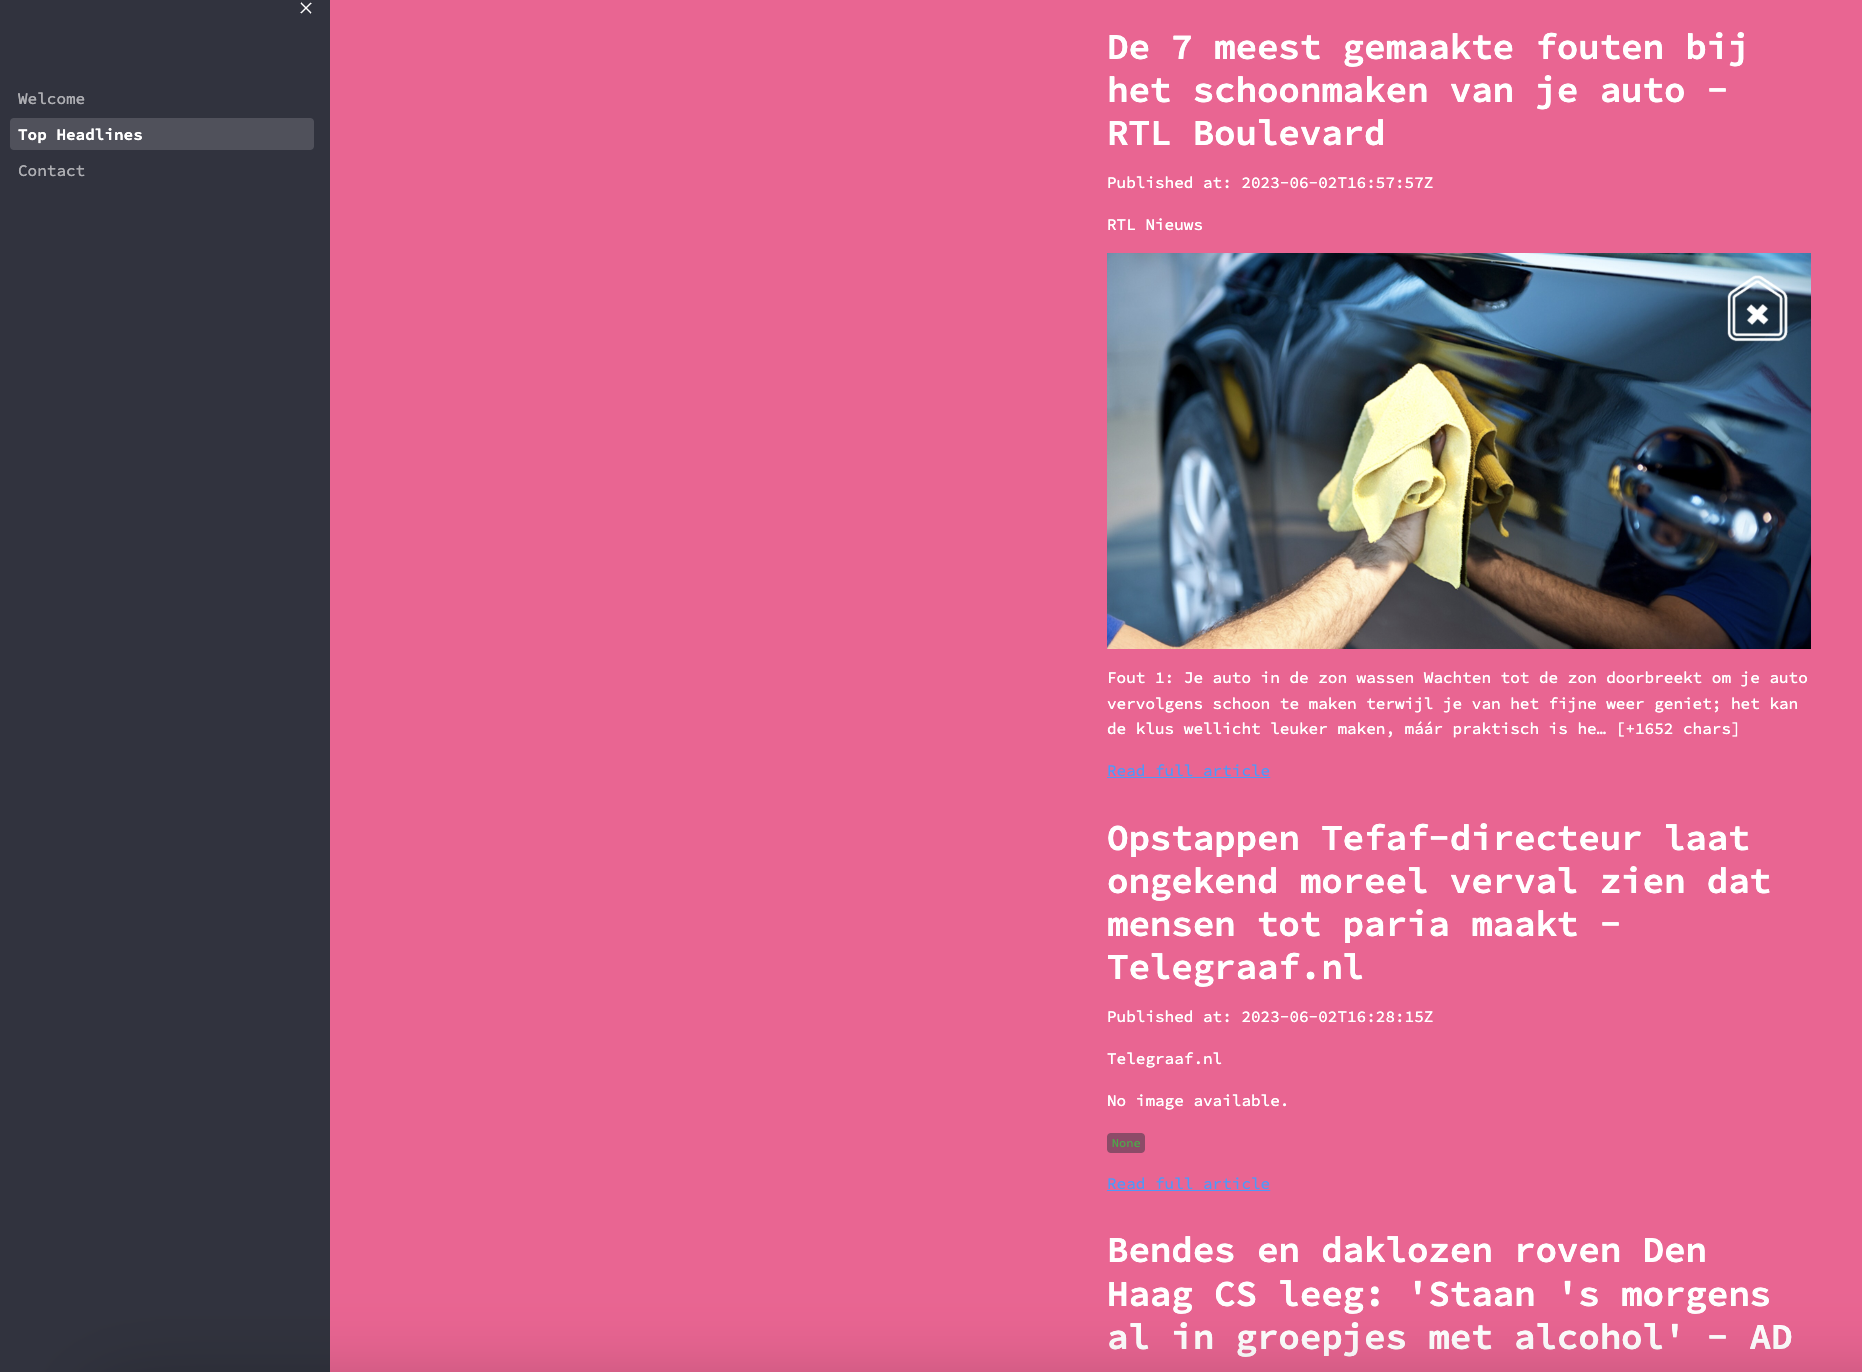

### Page 3: __'Contact' page__

This is a simple contact page where the users can simply know how to contact me for suggestions, issues, or fixes for the app. This is how it looks: ('here' is a hyperlink to my email ID).

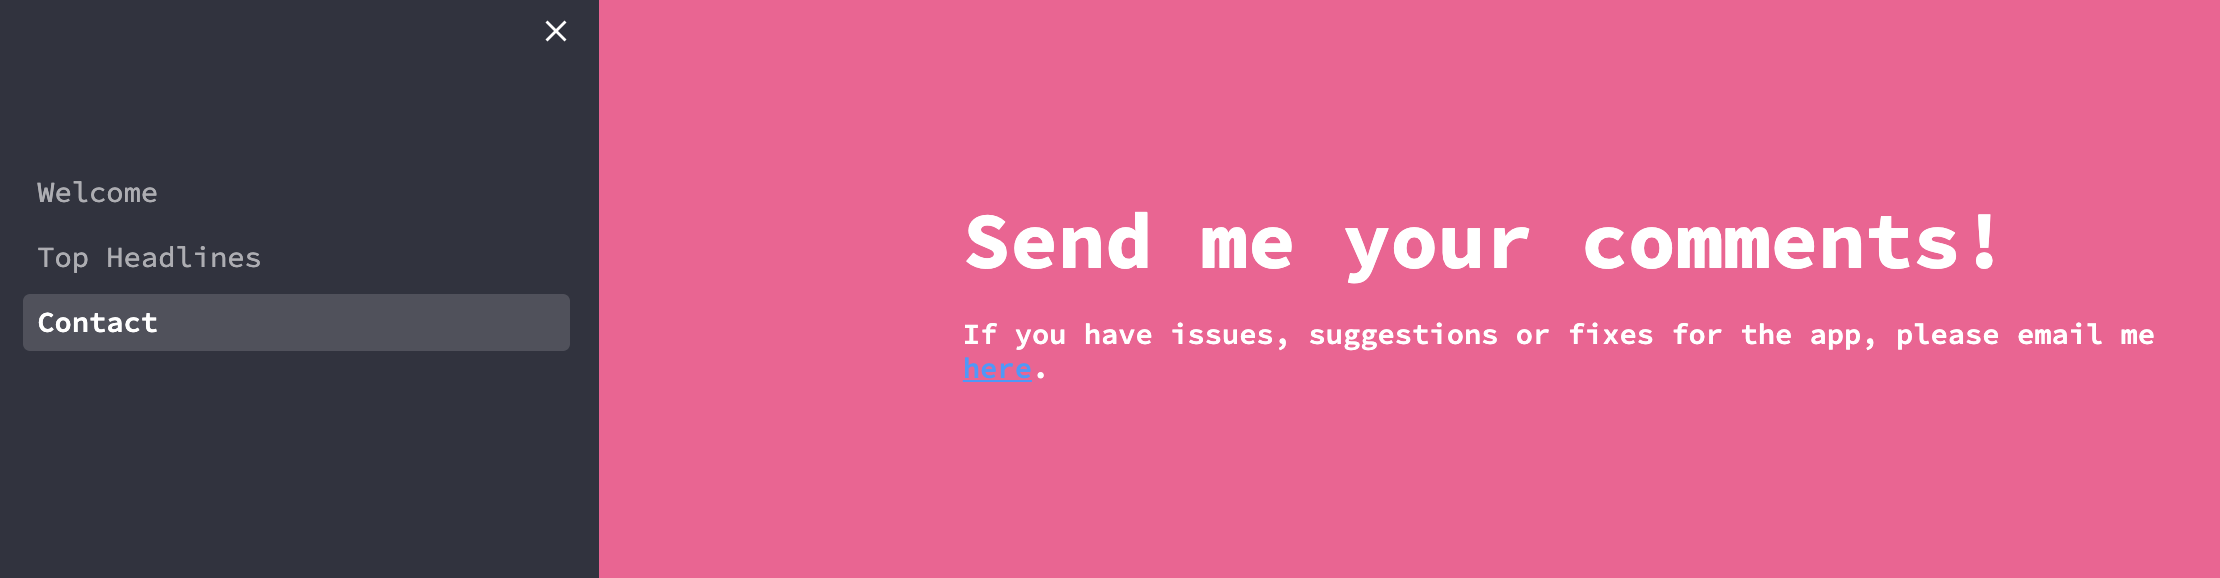

## __Part 2: User/Developers Guide__

### __For Users__:

The best part about Streamlit is that you can easily deploy your app and it is then accessible to the public. Hence, the easiest thing a user can do it hop over to this link and fetch news in an instant - __https://the-buzz.streamlit.app/__

There is thus no need to download Python, learn how it works, etc. It is a user friendly interface. 

### __For Developers and users who want to dig under the surface__:

1. Go to my GitHub repository: __https://github.com/nt-shah/The-Buzz__ (I've forked it from the Programming: The Next Step organisation repository since I had to transfer ownership, so it's easier for me to control and update things here. Please note that on the organisation repo my app is called 'Overheard-App', but that is only because it was my initial idea, and I have since not been able to change the name)

2. __Download the whole repository__ (can be done by going to the green _Code_ button > _Download ZIP_), see the screenshot here:

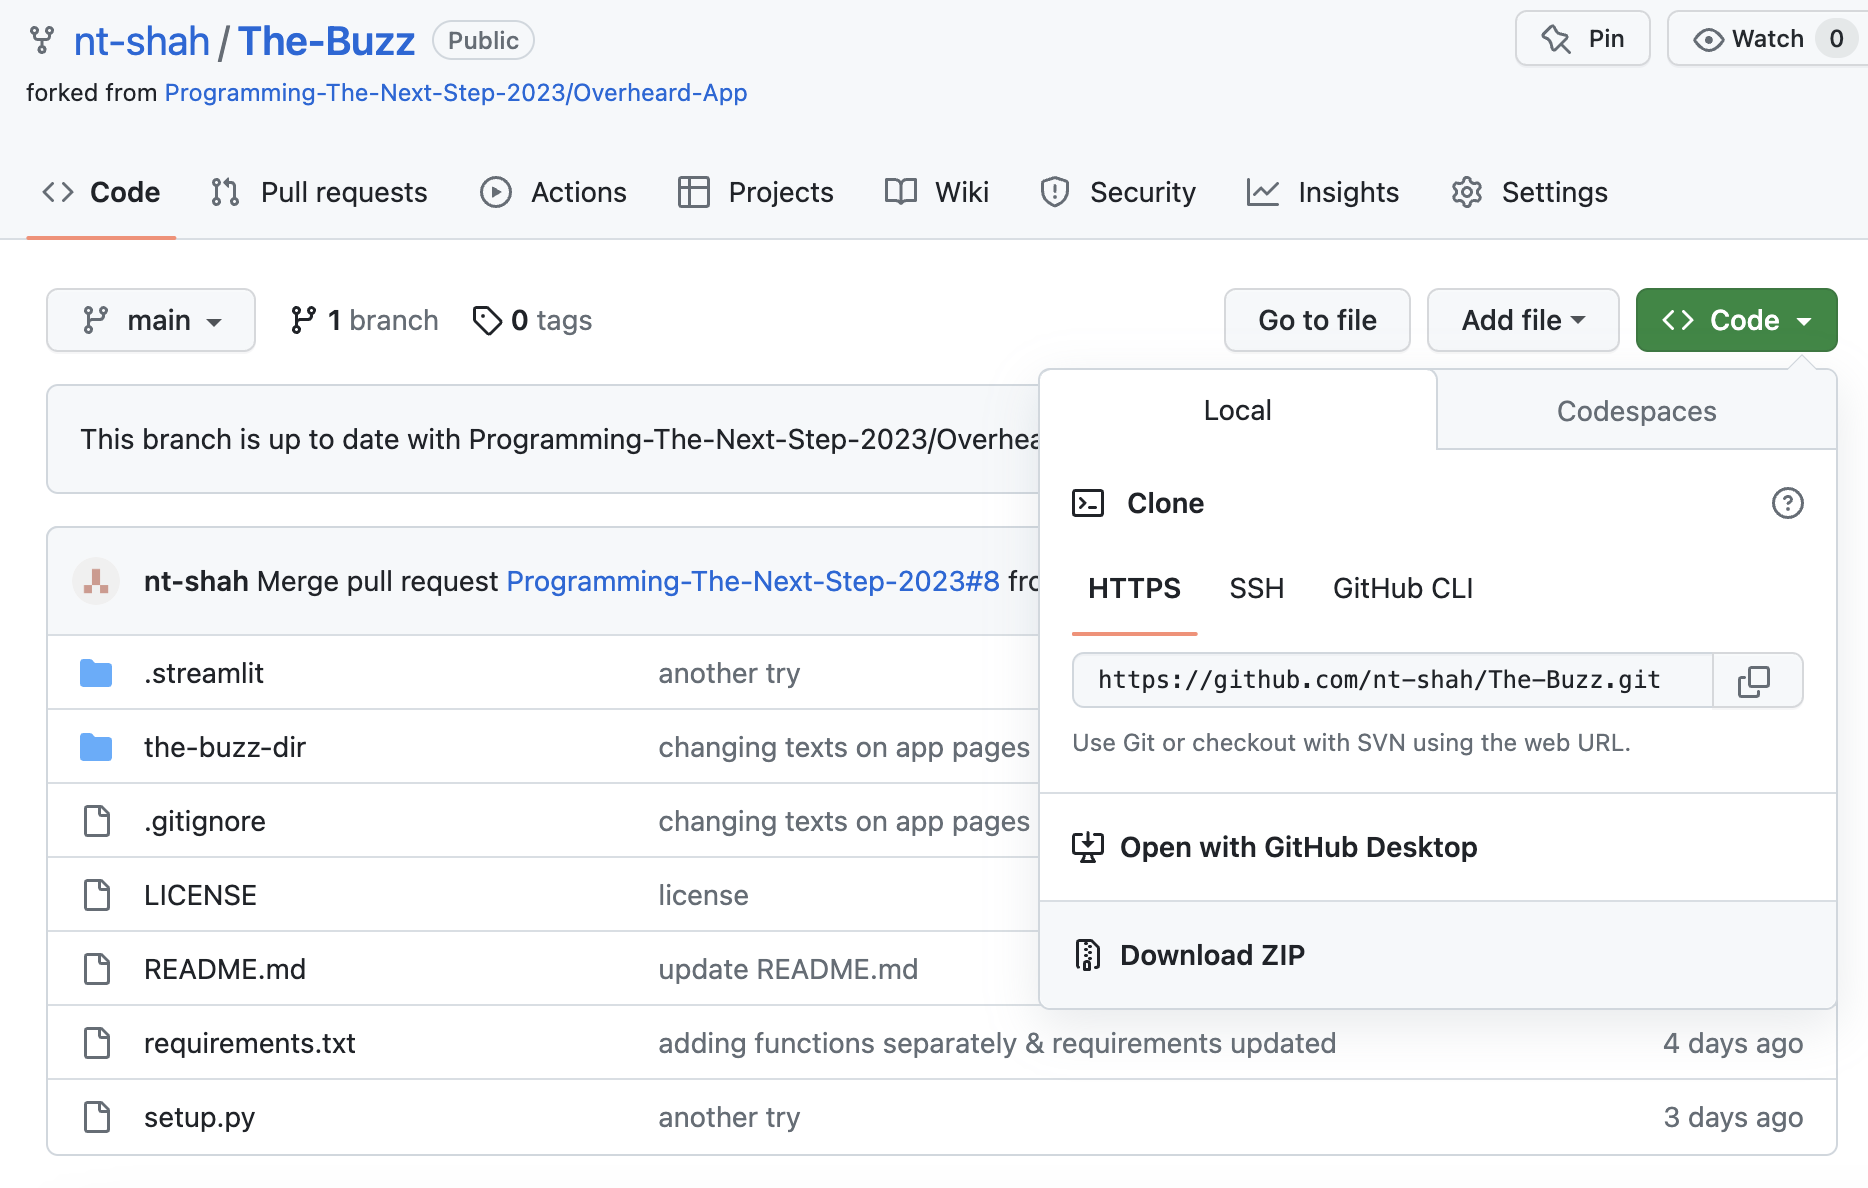

3. Now you will have my directory on your computer. Before we proceed, here is an __explanation of the whole repository__:

* Within the main folder there is a `LICENSE`, `README.md`, `requirements.txt` and `setup.py` file. These are not very relevant. Except maybe check the README.md out for an overview (although this report will fill you in sufficiently). 
* 2 folders: `.streamlit` and `the-buzz-dir`. 

__`.streamlit`__ folder: 
* `config.toml`, which helps set the theme. 
* Once you open the folder on your text editor (I recommend visual studio code), please add a new file in the `.streamlit` folder, and name it `secrets.toml`. I will instruct you later what to do with it. 

__`the-buzz-dir`__ folder: This is essentially the module and contains all the elements of a package. 
* `01_Welcome.py`- main app code / Welcome (main) page
* `pages` folder: `02_Top_Headlines.py` and `03_Contact.py` have the code for the other pages of the app.
* `functions.py` - stores all my functions which I then import to the app pages. 
* `test_api.py`- unit test to check if the API key is able to make requests successfully
* `test_getallnews.py`- whether my get_all_news function is working
* A bunch of png files for the vignette/report
* `thebuzz_vignette.ipynb` - report/vignette with all instructions (this file)

4. Install all python libraries according to `requirements.txt` since that also contains the versions you need.

5. Make an account on https://newsapi.org/ and __get your NewsAPI key__. You can get it for free.

* Make a `config.py` file in `the-buzz-dir.py` and save your key there as: `NEWS_API_KEY=" paste your key here"` (I import this key from this file for my tests so please do this so you can use my tests)
* Add this same key to `secrets.toml` in the `.streamlit` folder (again like `NEWS_API_KEY=" past key here"`)
* Currently, I am using my own for the app but when you download the GitHub repo, you will not have access to mine. If you do this, you are set to use your own key and my code and play around with it. 

6. Now feel free to __do whatever you want with the code__ - add new pages, edit the current pages. Just note that to see the app, you will need to __run the following on `terminal` --> `streamlit run the-buzz-dir/01_Welcome.py`__. If you rename any files, make sure you edit this to `streamlit run (your main file path)`. This is _just a local host of the app_ though, it is not accessible to the public

7. Later if you wish to deploy your own version of an edited news app, you need to make an account on Streamlit and deploy it. Further, __make sure to add `config.py` and `secrets.toml` to `.gitignore`__ because your API key is sensitive! 

*If you want to do some testing, check out my test files. They have some basic annotations on the code.

## __Part 3: Annotated Code__

This will be divided according to the different files in the package folder

#### __Libraries__

In [4]:
import streamlit as st
from streamlit import secrets
from datetime import datetime, date, timedelta
import requests
from PIL import Image
# from config import NEWS_API_KEY

#### __Functions: `functions.py`__

*Includes documentation of each function

##### Function 1: `get_all_news`

In [2]:
### WELCOME PAGE ==========================================
# Page where users can acess ALL NEWS 

# This function is to get news using the 'everything' endpoint from the News API using keyword, language and sortBy
# function is called get_all_news

def get_all_news(keyword, language, from_date, to_date, range_articles, sort_by):

    """
    This function returns a list of news articles according to the keyword, language, dates
    and in a specific order the user wants it sorted by. It returns between 0-10 articles
    depending on the users' choice. 

    Args:
        keyword (str): Keywords or phrases from the title or body of the news article 
        language (str): Language that the news articles should be in
        from_date (str): Date from which user wants to see articles (in ISO 8601 format; e.g., "2023-06-01")
        to_date (str) : Date until which user wants to see articles (in ISO 8601 format; e.g., "2023-06-01")
        range_articles (int) : Number of articles the user wants / results the request should return
        sort_by (str, optional): Order to sort articles by (relevancy / popularity / when published)

        
    Returns:
        list: A list of news articles (extracted based on the arguments) in JSON format

    """
    
    # NewsAPI 'everything' endpoint url and parameters:
    url = 'https://newsapi.org/v2/everything?'
    parameters = { 
        'q': keyword, 
        'language': language,
        'from': from_date,
        'to': to_date,
        'pageSize': range_articles,  # 0 - 100
        'apiKey': st.secrets["NEWS_API_KEY"] # your own API key
    }
    
    if sort_by:
        parameters['sortBy'] = sort_by
    
    # Requesting & converting output to JSON
    response = requests.get(url, params=parameters)
    response_json = response.json()
    articles = response_json.get('articles', [])
    
    return articles

##### Function 2: `get_top_headlines`

In [3]:
### TOP HEADLINES PAGE ==========================================
# Page where users can acess TOP HEADLINES

# This function is to get news using the 'top-headlines' endpoint from the News API
# function is called get_top_headlines

def get_top_headlines(keyword_top, category, language_top, from_date_top, to_date_top, range_top):
    
    """
    This function returns a list of top headlines articles according to the keyword or category, language and
    dates. It returns between 0-10 articles depending on the users' preference.

    Args:
        keyword_top (str, optional): Keywords or phrases from the title or body of the news article 
        category (str, optional): 
        language_top (str): Language that the news articles should be in
        from_date_top (str): Date from which user wants to see articles (in ISO 8601 format; e.g., "2023-06-01")
        to_date_top (str) : Date until which user wants to see articles (in ISO 8601 format; e.g., "2023-06-01")
        range_top (int) : Number of articles the user wants / results the request should return

        
    Returns:
        list: A list of top headline articles (extracted based on the arguments) in JSON format. 

    """
    # NewsAPI 'top headlines' endpoint url and parameters:
    url_top = 'https://newsapi.org/v2/top-headlines?'
    parameters = { 
        'q': keyword_top, 
        'category': category,
        'language': language_top,
        'from': from_date_top,
        'to': to_date_top,
        'pageSize': range_top,  # 0 - 100
        'apiKey': st.secrets["NEWS_API_KEY"] # your own API key
    }
    
    response = requests.get(url_top, params=parameters)
    response_json = response.json()
    articles = response_json['articles']

    for article in articles:
        st.header(article['title'])
        st.write("Published at:", article['publishedAt'])
        st.write(article['source']['name'])
        
        if 'urlToImage' in article and article['urlToImage']:
            try:
                image = Image.open(requests.get(article['urlToImage'], stream=True).raw)
                st.image(article['urlToImage'])
            except:
                st.write("Unable to display image.")
        else:
                st.write("No image available.")
        
        st.write(article['content'])
        st.markdown(f"[Read full article]({article['url']})")

#### __Main page: `01_Welcome.py`__ 

In [6]:
from functions import get_all_news # Importing function from the functions.py file

# ================================================================================================

# Title, header, instructions: -----------------------

# Giving the app a title, sub-header
title = st.markdown("# THE BUZZ")
header = st.subheader("A home-grown news app")

# Instructions
st.markdown('###### Here you can check for all news. If you specifically want __Top Headlines__, go to the next page from the sidebar!')

# ================================================================================================

## Language ----------------------------------------------------

language_mapping = {
    'german': 'de',
    'english': 'en',
    'spanish': 'es',
    'french': 'fr',
    'italian': 'it',
    'portugese': 'pt',
    'dutch': 'nl'
}

# ================================================================================================

## FUNCTION IMPORTED
from functions import get_all_news

# ================================================================================================

## INPUTS ---------------------------------------------------

# Keyword: ------
keyword = st.text_input('Keyword*')
st.markdown("*You have to enter a keyword. You may also use more keywords by joining them using AND and OR to optimise your search. (e.g. Erdogan AND elections / Biden OR Trump)*")

user_choice_language = st.selectbox('Select Language*', ['German', 'English', 'Spanish','French', 'Italian', 'Portugese', 'Dutch'])
language = language_mapping.get(user_choice_language.lower())

# Sort by: ------
sort_by = st.selectbox('Articles sorted by/according to: (optional)', ['', 'relevancy', 'popularity', 'publishedAt'])
st.markdown("*Note: Relevancy is how relevant the article is to the keyword*")

# Date: ------
# maximum allowed date (one month ago from today - News API limitations :))
today = date.today()
min_date = today - timedelta(days=30) # from
max_date = today - timedelta(days=1) # to

col1, col2 = st.columns(2) # to have two input boxes in one row

with col1:
    from_date = st.date_input('From which date', min_value=min_date, max_value=max_date, value=min_date)

with col2:
    to_date = st.date_input('To which date', min_value=min_date, max_value=max_date, value=max_date)

st.markdown("*Due to NewsAPI limitations, you can only search for news up to a month back.*")

# Article number: ----
range_articles = st.slider('How many articles do you want?', 0, 10)

# T&C:
agree = st.checkbox('I agree with the terms and conditions (scroll to the bottom of the page).*')

## ==================================================================================

# The enter button to get news - what the if statement will trigger :)

button1 = st.button('Enter')
if button1:

    # catching error (#1): users need to agree to terms and conditions
    if not agree:
        st.error("Please agree to the terms and conditions.")

    # catching error (#2): users need to enter keyword
    if agree:
        if not keyword: 
            st.error("Please enter a keyword to proceed and get news!")

        else:
            articles = get_all_news(keyword, language, from_date, to_date, range_articles, sort_by)
            
            # if nothing shows up / there is an issue, it could be due to two reasons:
            if not articles:
                st.write("No articles found for the provided keyword.")
                st.write("1. Please check that the keyword is in the language you want the news article in.")
                st.write("2. If that does not work, then there probably have been too many news requests today, and you will have to try again tomorrow! Sorry!")
                
            # else print articles as usual:
            else:
                for article in articles:
                    st.header(article['title'])
                    st.write("Published at:", article['publishedAt'])
                    st.write(article['source']['name'])
                    if 'urlToImage' in article and article['urlToImage']:
                        try:
                            image = Image.open(requests.get(article['urlToImage'], stream=True).raw)
                            st.image(article['urlToImage'])
                        except:
                            st.write("Unable to display image.")
                    else:
                        st.write("No image available.")
                    st.write(article['content'])
                    st.markdown(f"[Read full article]({article['url']})")

# to leave some gap
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")
st.write("  ")


## Terms and Conditions ------------------

st.markdown('#### Terms and Conditions')
st.write("Please agree not to request more than 10 articles in total (in all your searches) so that other people can also use this app! Due to API restrictions, only a limited number of articles can be requested per day.")

#### __Page 2: `02_Top_Headlines.py`__ 

In [5]:
from functions import get_top_headlines # get function from functions.py

st.markdown("# Top Headlines")

# ================================================================================================

## Language ----------------------------------------------------

language_mapping = {
    'german': 'de',
    'english': 'en',
    'spanish': 'es',
    'french': 'fr',
    'italian': 'it',
    'portugese': 'pt',
    'dutch': 'nl'
}

# ================================================================================================

## Info and Instructions: ---------------------------------------------------

st.markdown("##### Here you can check for top headlines or breaking news according to your search.")

st.markdown("*You must enter a date range and language in which you want articles. In addition to these, you can optionally add keywords and categories (you may add either one or both of these)*")

# User inputs ------

# Keyword will be found in either the body or title of the article
keyword_top = st.text_input('Keyword (optional)') 

# Category choices (as given in the News API)
category_options = [''] + ['business', 'entertainment', 'general', 'health', 'science', 'sport', 'technology']
category = st.selectbox('Choose Category (optional)', category_options)

# Language
user_choice_language_top = st.selectbox('Select Language*', ['German', 'English', 'Spanish','French', 'Italian', 'Portugese', 'Dutch'])  # User selects language from the dropdown
# Convert user input to the corresponding NewsAPI language value 
language_top = language_mapping.get(user_choice_language_top.lower())

# Dates
today = date.today()
min_date_top = today - timedelta(days=30)

col1, col2 = st.columns(2)

with col1:
    from_date_top = st.date_input('From which date', min_value=min_date_top, max_value=today, value=min_date_top)

with col2:
    to_date_top = st.date_input('To which date', min_value=min_date_top, max_value=today, value=today)

st.markdown("*Due to NewsAPI limitations, you can only search for news up to a month back.*")

# slider / select_slider
range_top = st.slider('How many articles do you want?', 0, 10)

# ================================================================================================

## FUNCTION from functions.py
from functions import get_top_headlines

button2 = st.button('Enter')
if button2:
    
    if button2: # Adding all conditions because keyword and category are optional inputs
        if keyword_top and language_top: # keyword + language 
            get_top_headlines(keyword_top, None, language_top.lower(), from_date_top, to_date_top, range_top)
        elif keyword_top and category and language_top: # keyword + category + language
            get_top_headlines(keyword_top, category, language_top, from_date_top, to_date_top, range_top)
        elif category and language_top: # category + language
            get_top_headlines(None, category, language_top, from_date_top, to_date_top, range_top)
        elif language_top: # language
            get_top_headlines(None, None, language_top, from_date_top, to_date_top, range_top)


2023-06-03 22:25:04.071 
  command:

    streamlit run /Users/nitya/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-06-03 22:25:04.072 Session state does not function when running a script without `streamlit run`


#### __Page 3: `Contact`__ 

In [ ]:
st.markdown("# Send me your comments!")

st.markdown("###### If you have issues, suggestions or fixes for the app, please email me [here](mailto: ... my email ID).")